10. Виконати гістограмне збільшення гамми (див. лекція №1). Провести порівняльний  аналіз 


In [1]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt 
import urllib.request
import numpy as np
import matplotlib 
import cv2 

In [2]:
def import_url_img(url):
  url_response = urllib.request.urlopen(url)
  return cv2.imdecode(np.array(bytearray(url_response.read()), dtype=np.uint8), -1)


In [3]:
url = "https://upload.wikimedia.org/wikipedia/commons/4/41/Sunflower_from_Silesia2.jpg"
img = import_url_img(url)

img = cv2.resize(img, (img.shape[1]//3, img.shape[0]//3))

In [4]:
# plt.hist(img.ravel(),256,[0,256]) 
# plt.show()

In [5]:
def gamma_corr(img, gamma):
  img = 255.0 * (img / 255.0)**gamma
  return np.asarray(img, dtype = np.int64) 

Зміна контрасності


In [6]:
def point_operation(img, K, L): 
  img = np.asarray(img, dtype=np.float64) 
  img = img*K + L 
  # clip pixel values 
  img[img > 255] = 255 
  img[img < 0] = 0 
  #return cv2.LUT(img2, img)
  return np.asarray(img, dtype = np.int64) 


In [29]:
res_mult = 8
img2 = cv2.resize(img, (img.shape[1]//res_mult, img.shape[0]//res_mult))
low_res_img = cv2.resize(img2, (img.shape[1], img.shape[0]))

low_contr_img=point_operation(img, 1, 100)
hight_contr_img=point_operation(img, 1, -100)

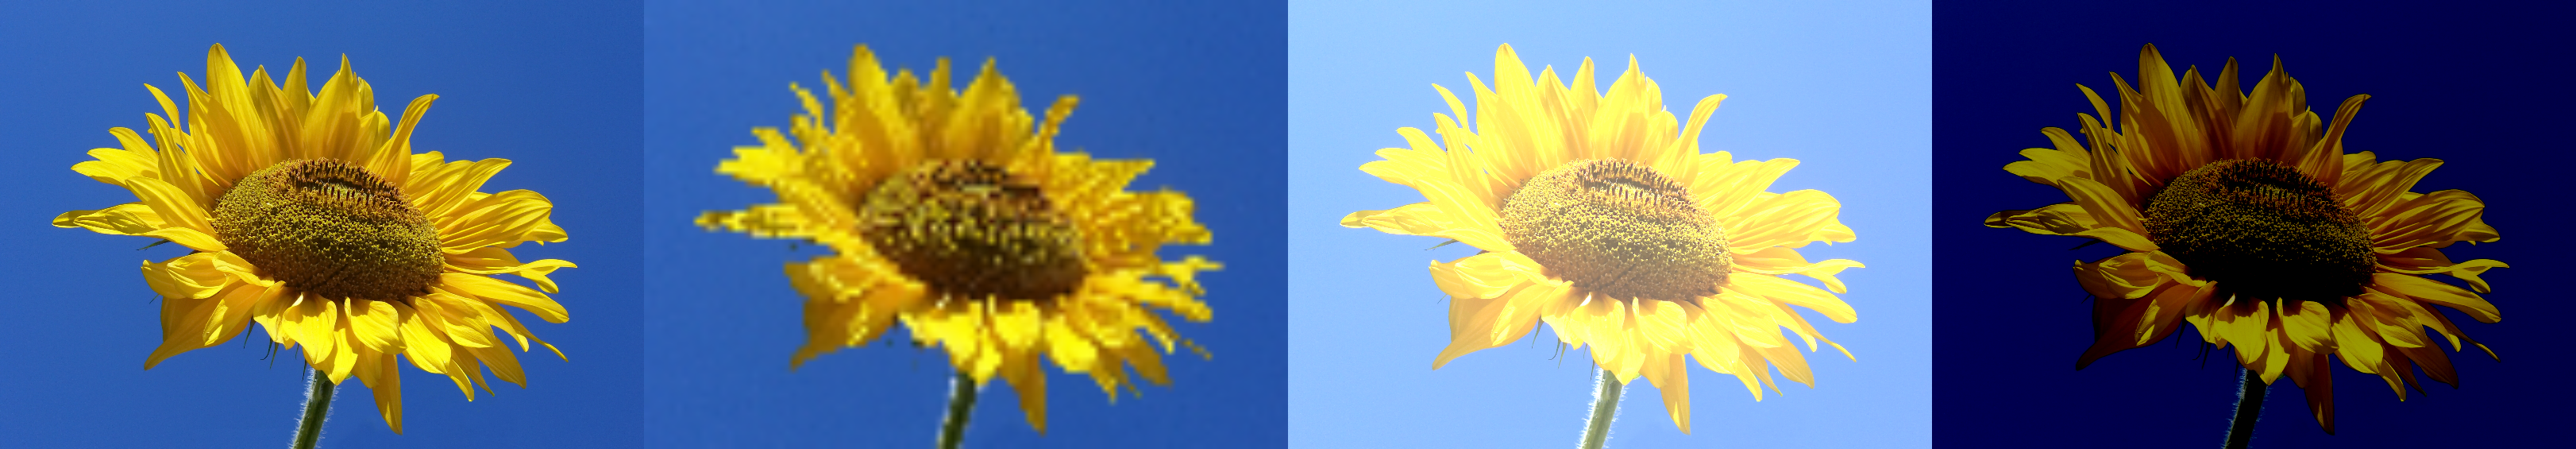

In [30]:
gamma=1

cv2_imshow(np.concatenate((gamma_corr(img, gamma), 
                           gamma_corr(low_res_img, gamma), 
                           gamma_corr(low_contr_img, gamma),
                           gamma_corr(hight_contr_img, gamma)), axis=1))

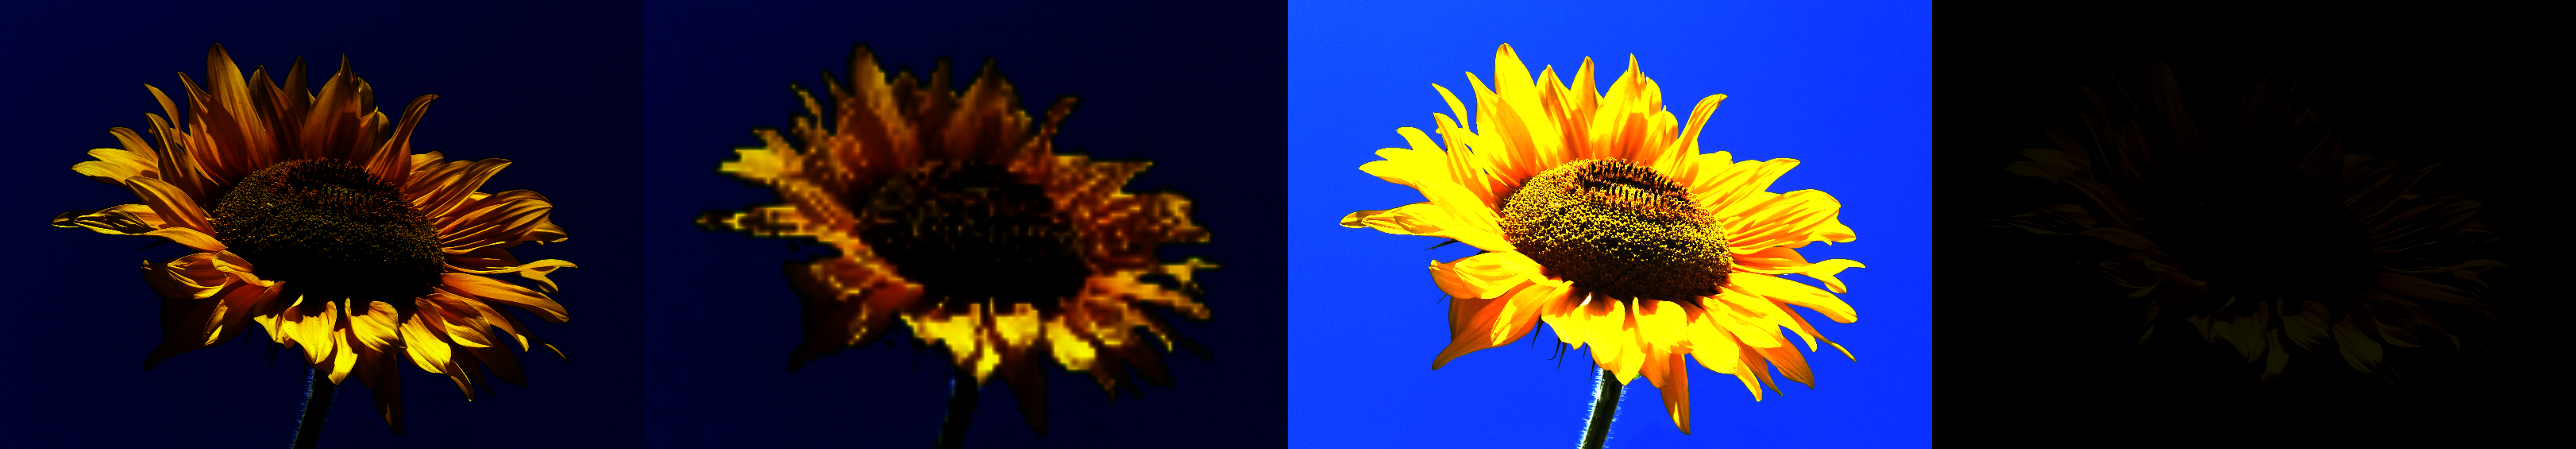

In [31]:
gamma=5

cv2_imshow(np.concatenate((gamma_corr(img, gamma), 
                           gamma_corr(low_res_img, gamma), 
                           gamma_corr(low_contr_img, gamma),
                           gamma_corr(hight_contr_img, gamma)), axis=1))


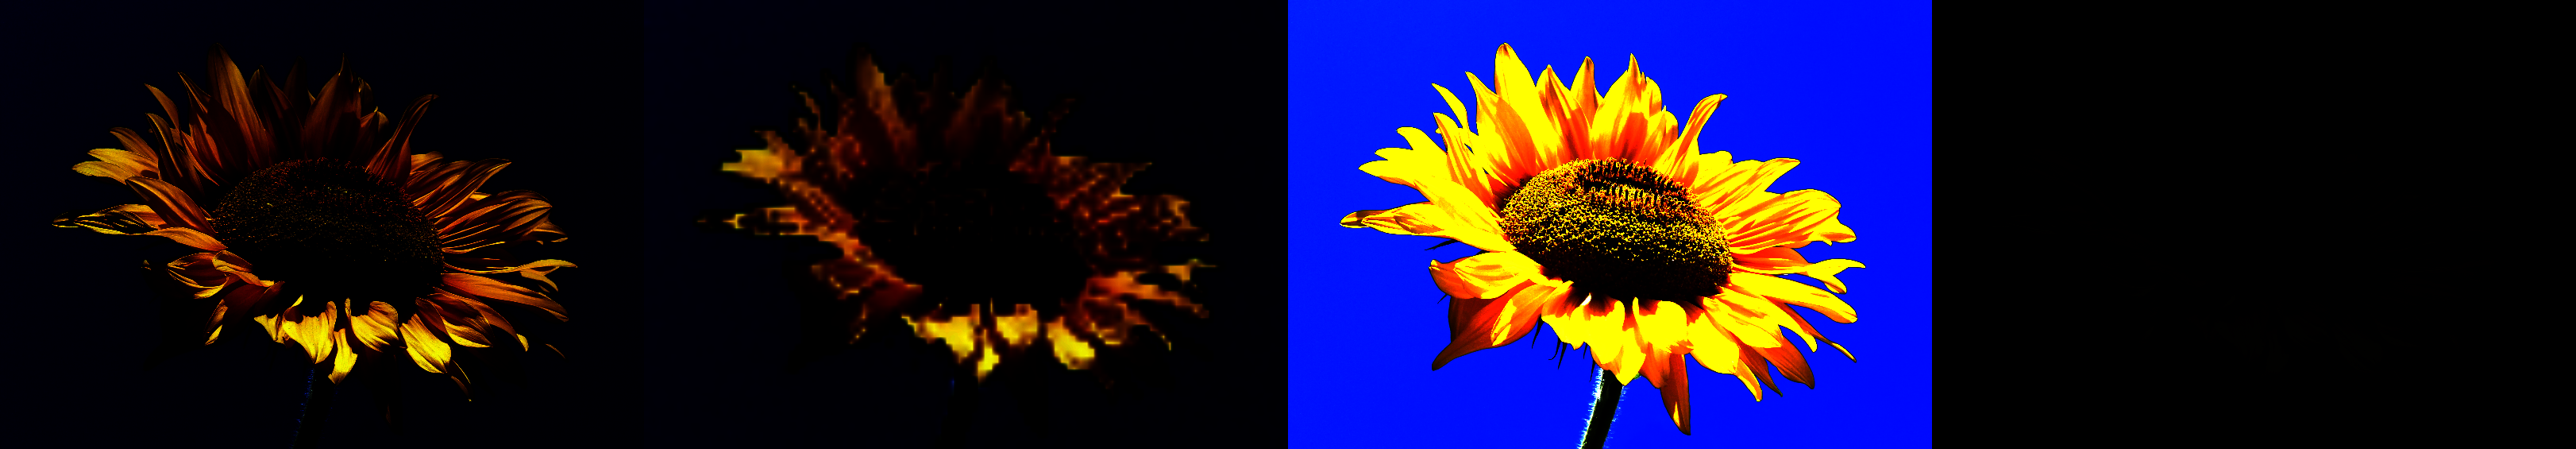

In [32]:
gamma=10

cv2_imshow(np.concatenate((gamma_corr(img, gamma), 
                           gamma_corr(low_res_img, gamma), 
                           gamma_corr(low_contr_img, gamma),
                           gamma_corr(hight_contr_img, gamma)), axis=1))

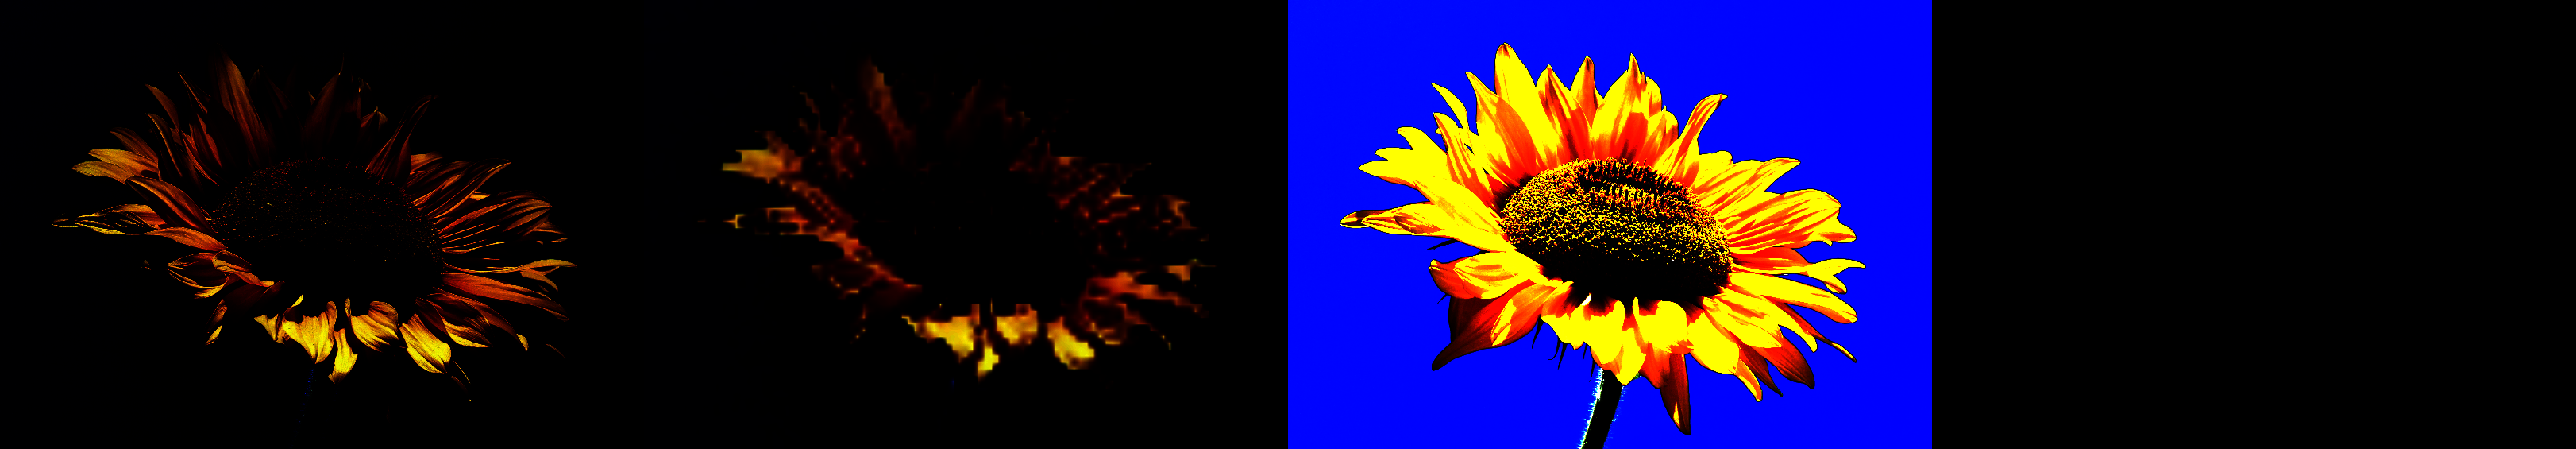

In [33]:
gamma=15

cv2_imshow(np.concatenate((gamma_corr(img, gamma), 
                           gamma_corr(low_res_img, gamma), 
                           gamma_corr(low_contr_img, gamma),
                           gamma_corr(hight_contr_img, gamma)), axis=1))